In [1]:
import json
import os
from itertools import cycle, islice
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def generate_colors(df):
    hex_colours = ["#e66581", "#5799c9", "#f5a252", "#9ebd6e", "#e1f0c4"]
    return list(islice(cycle(hex_colours), None, len(df)))

In [3]:
def autolabel(rects, ax):
    for rect in rects:
        x = rect.get_x() + (rect.get_width() / 2.0)
        y = rect.get_height()
        ax.annotate(
            f"{y}",
            (x, y),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

In [27]:
def plot_choices_question(data, question, choices):
    fig = plt.figure(figsize=(12, 8))
    hist = data[question].value_counts()

    for choice in choices:
        if choice not in hist.index:
            hist = pd.concat([hist, pd.Series(0, index=[choice])])

    ax = hist.plot(kind="bar", color=generate_colors(hist), rot=0)

    ax.set_title(question, fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    autolabel(ax.patches, ax)

    plt.show();

In [24]:
def plot_scales_question(data, question, choices):
    question_cols = [col for col in data.columns if question in col]
    rankings = np.arange(1.0, 6.0, 1)
    new_series = pd.Series(dtype=float)

    for i, col in enumerate(question_cols):
        tmp_series = pd.Series(data={choices[i]: data[col].mean()})
        new_series = pd.concat([new_series, tmp_series])

    fig = plt.figure(figsize=(12, 8))
    ax1 = new_series.sort_values(ascending=True).plot(
        kind="barh", color=generate_colors(new_series)[::-1]
    )

    ax1.set_title(question, fontsize=14)
    ax1.set_xlim(1, 5)
    ax1.set_xticks([])
    ax1.set_xlabel("")
    ax1.set_ylabel("Strongly Disagree", fontsize=18)
    ax1.spines["top"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

    ax2 = ax1.twinx()
    ax2.set_yticks([])
    ax2.set_ylabel("Strongly Agree", fontsize=18)
    ax2.spines["top"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)

    plt.show();

In [4]:
# Set filepaths
ABSOLUTE_HERE = Path(os.getcwd()).parent
processed_data_dir = ABSOLUTE_HERE.parent.joinpath("data/processed")
data_filepath = processed_data_dir.joinpath("survey-responses.csv")
questions_filepath = processed_data_dir.joinpath("questions_metadata.json")

In [5]:
# Load datasets
with open(questions_filepath) as stream:
    question_metadata = json.load(stream)

data = pd.read_csv(data_filepath, index_col="Voter")

### Question 1

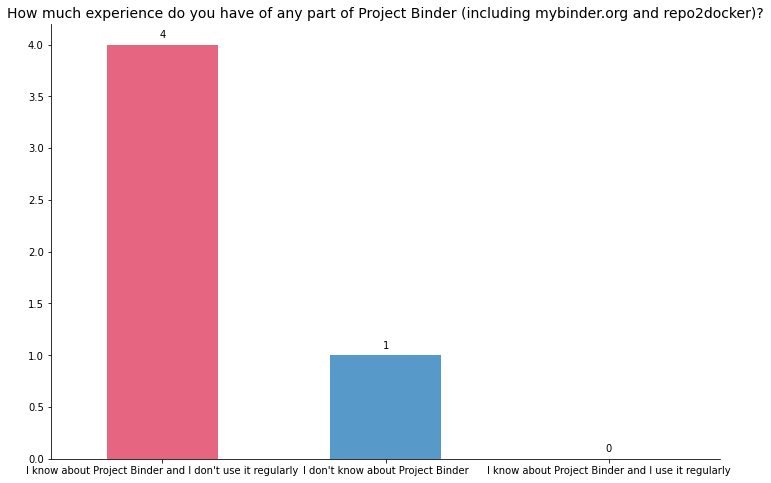

In [28]:
question = question_metadata[0]["question"]
choices = question_metadata[0]["choices"]

plot_choices_question(data, question, choices)

### Question 2

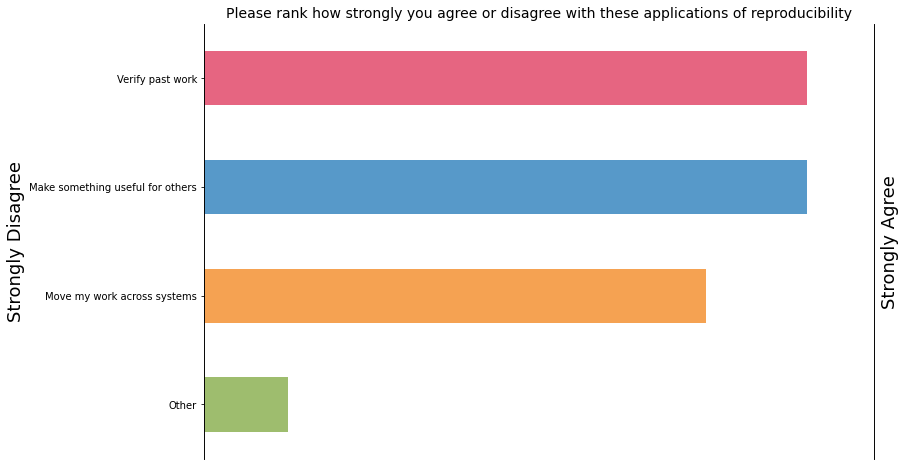

In [25]:
question = question_metadata[1]["question"]
choices = question_metadata[1]["choices"]
choices = ["Other" if "Other" in choice else choice for choice in choices]

plot_scales_question(data, question, choices)

### Question 3

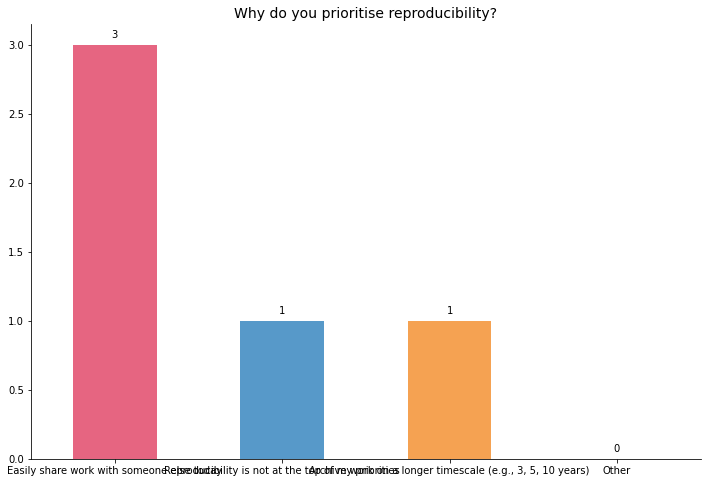

In [34]:
question = question_metadata[2]["question"]
choices = question_metadata[2]["choices"]
choices = ["Other" if "Other" in choice else choice for choice in choices]

plot_choices_question(data, question, choices)

In [ ]:
for qmd in question_metadata:
    print(qmd["type"])